## Distant reading course week 2 (VT-23)

### Learning material 2a: Counting frequencies and bigrams (and visualising the results)

Matti La Mela

In this learning material, we will use pandas library to count and save a csv for visualization. We can visualise the csv files either with other software (excel, RAWtools, etc.) or with python. There is optional material about basics of visualization in Python.


In [9]:
# We will take Pride and Prejudice from Project Gutenberg with a simple http request:

# NB, you can also open the URL in your browser to see that this is the right text. Remember utf-8!

import requests

request = requests.get("https://www.gutenberg.org/cache/epub/42671/pg42671.txt")

request.encoding = "utf-8"
book = request.text

In [10]:
# Let's see how the book looks like

print (len(book))

print (book[:1000])


725046
﻿The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited
by R. W. (Robert William) Chapman


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org





Title: Pride and Prejudice


Author: Jane Austen

Editor: R. W. (Robert William) Chapman

Release Date: May 9, 2013  [eBook #42671]

Language: English


***START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE***


E-text prepared by Greg Weeks, Jon Hurst, Mary Meehan, and the Online
Distributed Proofreading Team (http://www.pgdp.net) from page images
generously made available by Internet Archive (https://archive.org)



Note: Project Gutenberg also has an HTML version of this
      file which includes the original illustrations.
      See 42671-h.htm or 42671-h.zip:
      (http://www.gute


In [11]:
# It is quite long, so let's take the first ten chapters of the book.
# Let's use the first and last sentence to find the offsets for the index and then store this to a new string.

start = book.find("It is a truth universally acknowledged")
end = book.find("leaving her room for a couple of hours that evening.")


# We could also use CHAPTER I etc. when using find(), but be careful if there are tables of content in your file..

end += len("leaving her room for a couple of hours that evening.")  # we need to add this bit make the index include it too. Find returns us the location in the string where this sentence starts


In [12]:
# We assign this slice of ten first chapters to the variable chapters

chapters = book[start:end]

# Let's print that it looks ok:

print(chapters[0:100])

print("")

print(chapters[-100:]) # -100 starts from the 100 chars before the end of the string

print("")

print(len(chapters))

It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be 

ane was already so much recovered
as to intend leaving her room for a couple of hours that evening.

89090


In [13]:
import re

# We do a bit of cleaning, if we would continue our analysis in Python only .. as we know, Spacy is very helpful with cleaning. But:

chapters_clean = chapters.lower() # lowercase
chapters_clean = chapters_clean.replace("\n", " ") # replace endlines with " ", if there is an extra space in some txt-type, then we could remove the endlines
chapters_clean = re.sub(r"[^a-z0-9\s]", "", chapters_clean) # we replace everything else than a-z 0-9 and whitespace \s (regex character for whitespace) with "".
tokens = chapters_clean.split() # we split this into a list


print(tokens[0:100])

['it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', 'however', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', 'that', 'he', 'is', 'considered', 'as', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', 'my', 'dear', 'mr', 'bennet', 'said', 'his', 'lady', 'to', 'him', 'one', 'day', 'have', 'you', 'heard', 'that', 'netherfield', 'park', 'is', 'let', 'at', 'last', 'mr', 'bennet', 'replied', 'that', 'he', 'had', 'not', 'but']


In [14]:
# we can count elements on the list with the count() method

print(tokens.count("she"))
print(tokens.count("he"))


171
170


In [15]:
# We can sort the list, and have a look how it looks like.

tokens_sorted = tokens
tokens_sorted.sort()

print(tokens_sorted)


['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

In [16]:
# For more counting, it is possible to use Counters, which is a collection or a container for counting elements part of our variables.

# We could also take this work list to excel for instance, and continue counting and visualization there

# However, we will do more counting with Pandas dataframes in the following:


In [17]:
# Let's continue with spacy for some operations: we import spacy, load the language model, and process our text into a Spacy Doc object called here part1_doc

import spacy

nlp = spacy.load("en_core_web_sm")

chapters_doc = nlp(chapters, disable=["parser", "ner"])  # We disable the parser and ner processes with are part of the Spacy nlp pipeline to gain some speed

In [18]:
# Let's take the lemmas and non-stop words only; and have a look how the "trash" looks like

# we use "and" in the if statement, so when token.is_alpha and token.is_stop == False (thus is not a stopword), we same the lemma on our list.
# Otherwise (else) this is store to cleaned_tokens list

lemmas = []
cleaned_tokens = []

for token in chapters_doc:
    if token.is_alpha and (token.is_stop == False):
        lemmas.append(token.lemma_)
    else:
        cleaned_tokens.append(token)
                             
print(lemmas[0:200])

# you can see how the non-alphanumerical & stopwords look like:

# print(cleaned_tokens[0:200])


['truth', 'universally', 'acknowledge', 'single', 'man', 'possession', 'good', 'fortune', 'want', 'wife', 'little', 'know', 'feeling', 'view', 'man', 'enter', 'neighbourhood', 'truth', 'fix', 'mind', 'surround', 'family', 'consider', 'rightful', 'property', 'daughter', 'dear', 'Bennet', 'say', 'lady', 'day', 'hear', 'Netherfield', 'Park', 'let', 'Bennet', 'reply', 'return', 'Long', 'tell', 'Bennet', 'answer', 'want', 'know', 'take', 'cry', 'wife', 'impatiently', 'want', 'tell', 'objection', 'hear', 'invitation', 'dear', 'know', 'Long', 'say', 'Netherfield', 'take', 'young', 'man', 'large', 'fortune', 'north', 'England', 'come', 'Monday', 'chaise', 'place', 'delight', 'agree', 'Morris', 'immediately', 'possession', 'Michaelmas', 'servant', 'house', 'end', 'week', 'Bingley', 'married', 'single', 'Oh', 'single', 'dear', 'sure', 'single', 'man', 'large', 'fortune', 'thousand', 'year', 'fine', 'thing', 'girl', 'affect', 'dear', 'Bennet', 'reply', 'wife', 'tiresome', 'know', 'think', 'marry'

In [19]:
# Let's save this to a file, so we can open it with Excel, Antconc Voyant tools, or similar for more analysis and visualization

with open("./output_lemmas.txt", mode="w", encoding="utf-8") as file:
    for lemma in lemmas:
        file.write(lemma)
        file.write("\n")


### 2. Data in tabular format (pandas)

In this exercise with use only Pandas Series which contain only one list, whereas pandas dataframes can contain several lists. You can compare this to excel sheet, where you have only one column (pandas Series) or several columns (pandas dataframe).

In [20]:
# We want to do some basic calculations in Python about word frequencies. For this we use pandas where we can handle numbers in tables.

import pandas as pd

In [21]:
# We organise our list of lemmas (that we created in the previous section) into an array with Pandas

lemmas_series = pd.Series(lemmas, name="chapters_lemmas")

# If you want, you can check the type of our object. We see that we have a Pandas series here.

# print(type(lemmas_series))

In [22]:
# when we print the Series we get only the first and the last entries, which makes it easy to study

print(lemmas_series)

0             truth
1       universally
2       acknowledge
3            single
4               man
           ...     
5798          leave
5799           room
5800         couple
5801           hour
5802        evening
Name: chapters_lemmas, Length: 5803, dtype: object


In [23]:
# the method value_counts() of the Series will return another Series where all same values have been summed up: we will get frequencies

lemmas_count = lemmas_series.value_counts()

print(lemmas_count)

# Again, we have only one list so this is a Series. The index

# print(type(lemmas_count))


Bingley      111
say           86
Miss          75
Bennet        71
Elizabeth     71
            ... 
duty           1
tide           1
milliner       1
frequent       1
couple         1
Name: chapters_lemmas, Length: 1647, dtype: int64


In [24]:
# Here the term index refers to the names of the terms which we had on the original list:

print(lemmas_count.index)



Index(['Bingley', 'say', 'Miss', 'Bennet', 'Elizabeth', 'Darcy', 'sister',
       'think', 'know', 'Jane',
       ...
       'clerk', 'convenient', 'please', 'popularity', 'thither', 'duty',
       'tide', 'milliner', 'frequent', 'couple'],
      dtype='object', length=1647)


In [25]:
# They correspond to list of values, which can be printed when they are converted to a list. Here we print the ten first values, thus which are the frequencies of
# "Bingley", "say", "Miss", "Elizabeth" ..

print(list(lemmas_count)[0:10])

[111, 86, 75, 71, 71, 70, 50, 49, 46, 45]


In [26]:
# Let's save the frequencies of our lemmas: we can open csv in excel for instance for further operations!

lemmas_count.to_csv("./lemmas.csv", encoding="utf-8")

In [27]:
# One more time, we can have a look at the 20 most common terms:

print(lemmas_count[:20])

Bingley      111
say           86
Miss          75
Bennet        71
Elizabeth     71
Darcy         70
sister        50
think         49
know          46
Jane          45
dance         35
young         34
good          34
lady          32
great         30
dear          28
like          28
room          28
man           27
friend        27
Name: chapters_lemmas, dtype: int64


### 3. Counting bigrams

Bigrams (and ngrams) are sequences of two words (bi) or n-words (ngram). They are useful for studying how the words occur together. There are many applications for ngrams, eg. for predicting word occurrence or building single entities when two words should occur together (eg. better to have New York for analysis (New_York) than New and York separately.

The bigrams (2-gram) of the sentence "The weather is very good" are:

- The weather
- weather is
- is very
- very good


In [28]:
# We cannot continue with our lemmas list, while we need stopwords for building the bigrams

# Let's process our spacy_doc again! This time we won't remove stopwords.

# In this example we do not store the non-alphanumerical in the "else" part. We have saved them previously for seeing what is removed,
# if there are errors etc.

tokens_cleaned = []
tokens_lemma = []

for token in chapters_doc:
    if token.is_alpha:
        tokens_lemma.append(token.lemma_)
        
print(tokens_lemma[0:50])


['it', 'be', 'a', 'truth', 'universally', 'acknowledge', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', 'however', 'little', 'know', 'the', 'feeling', 'or', 'view', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'enter', 'a', 'neighbourhood', 'this', 'truth', 'be', 'so', 'well', 'fix', 'in', 'the']


In [29]:
# we use nltk library, which has powerful tools for basic NLP operations. nltk.bigrams() turns a string into bigrams, which we save as a list to variable
# token_bigrams

import nltk

token_bigrams = list(nltk.bigrams(tokens_lemma))

# This is a list containing lists. We can access the elements of the list in the list by two brackets:

print(token_bigrams[0:50])  # prints two first entries in our list token_bigrams

# print(token_bigrams[0][0]) # prints the first element in of the first element in our list token_bigrams


[('it', 'be'), ('be', 'a'), ('a', 'truth'), ('truth', 'universally'), ('universally', 'acknowledge'), ('acknowledge', 'that'), ('that', 'a'), ('a', 'single'), ('single', 'man'), ('man', 'in'), ('in', 'possession'), ('possession', 'of'), ('of', 'a'), ('a', 'good'), ('good', 'fortune'), ('fortune', 'must'), ('must', 'be'), ('be', 'in'), ('in', 'want'), ('want', 'of'), ('of', 'a'), ('a', 'wife'), ('wife', 'however'), ('however', 'little'), ('little', 'know'), ('know', 'the'), ('the', 'feeling'), ('feeling', 'or'), ('or', 'view'), ('view', 'of'), ('of', 'such'), ('such', 'a'), ('a', 'man'), ('man', 'may'), ('may', 'be'), ('be', 'on'), ('on', 'his'), ('his', 'first'), ('first', 'enter'), ('enter', 'a'), ('a', 'neighbourhood'), ('neighbourhood', 'this'), ('this', 'truth'), ('truth', 'be'), ('be', 'so'), ('so', 'well'), ('well', 'fix'), ('fix', 'in'), ('in', 'the'), ('the', 'mind')]


In [30]:
# We process our list of lists a bit, and make it into a list of strings, where the bigram elements are combined. This is easier to operate.
# eg. [('it', 'be'), ('be', 'a')] into a list of strings
# -> ["it be", "be a"

bigrams = []

for bigram in token_bigrams:
    bigrams.append(bigram[0] + ' ' + bigram[1])

print(bigrams[0:5])

['it be', 'be a', 'a truth', 'truth universally', 'universally acknowledge']


In [31]:
# Lets use our bigrams for simple analysis. Can we find any differences between uses of "he" and "she"
# in the text when look at the bigrams?

# We use the regex \bhe\b for capturing "he" and \bshe\b for capturing "she". \b marks word boundary. NB we need two \\ while the python syntax removes the \ in this
# string operation.
#
# We want to capture also possession bigrams, eg. his and her. For his and her, we take only bigrams where the "his" is the first word of the bigram.


he_bigrams = []
she_bigrams = []

his_bigrams = []
her_bigrams = []

for bigram in bigrams:
    if re.search("\\bhe\\b", bigram):     # \\b -> \b
        he_bigrams.append(bigram)
    if re.search("\\bshe\\b", bigram):
        she_bigrams.append(bigram)
    if re.search("\\bhis\\b", bigram.split()[0]):   # we split the bigram into two, and do the searching only concerning the first bigram word
        his_bigrams.append(bigram)
    if re.search("\\bher\\b", bigram.split()[0]):   # we split the bigram into two, and do the searching only concerning the first bigram word
        her_bigrams.append(bigram)
    


In [32]:
# Let's take them to pandas Series and calculate directly the frequencies with value_counts()


he_bigrams_count = pd.Series(he_bigrams, name = "he").value_counts()
she_bigrams_count = pd.Series(she_bigrams, name = "she").value_counts()
his_bigrams_count = pd.Series(his_bigrams, name = "his").value_counts()
her_bigrams_count = pd.Series(her_bigrams, name = "her").value_counts()

# we can have a look at the he & his terms. 

print(he_bigrams_count[:40])
print("******************")
print(she_bigrams_count[:40])



he be          36
he have        26
that he        20
with he        12
he do          12
if he           9
he and          8
he would        8
as he           7
he could        6
to he           6
for he          6
and he          5
he he           5
but he          5
he to           4
say he          4
between he      4
he from         4
when he         4
he in           4
see he          3
he continue     3
he reply        3
ask he          3
he seem         3
like he         3
he on           3
however he      3
he must         3
whether he      3
visit he        3
he should       3
he come         3
he one          3
he at           3
know he         2
though he       2
he make         2
he might        2
Name: he, dtype: int64
******************
she be         48
she have       22
that she       13
to she         12
with she       10
she could      10
as she         10
of she          9
she to          8
for she         8
see she         7
say she         7
when she        7
thin

In [33]:
# how about the his and her bigrams?

print(his_bigrams_count[0:50])
print("****************")
print(her_bigrams_count[0:50])


his sister          11
his own             10
his friend           8
his wife             7
his character        5
his have             4
his letter           4
his attention        3
his answer           3
his manner           3
his first            2
his ask              2
his house            2
his temper           2
his pride            2
his gallantry        2
his kindness         2
his companion        2
his library          2
his second           2
his complaisance     1
his asserting        1
his doing            1
his breakfast        1
his regimental       1
his approach         1
his niece            1
his patient          1
his her              1
his daughter         1
his neighbour        1
his composure        1
his attempt          1
his face             1
his housekeeper      1
his anxiety          1
his word             1
his approbation      1
his idea             1
his notice           1
his dislike          1
his behaviour        1
his plan             1
his return 

In [34]:
# Let's save the output

his_bigrams_count.to_csv("./bigrams-his.csv", encoding="utf-8")

her_bigrams_count.to_csv("./bigrams-her.csv", encoding="utf-8")



Try to open the csv in Excel!

### 4. Visualization (optional)

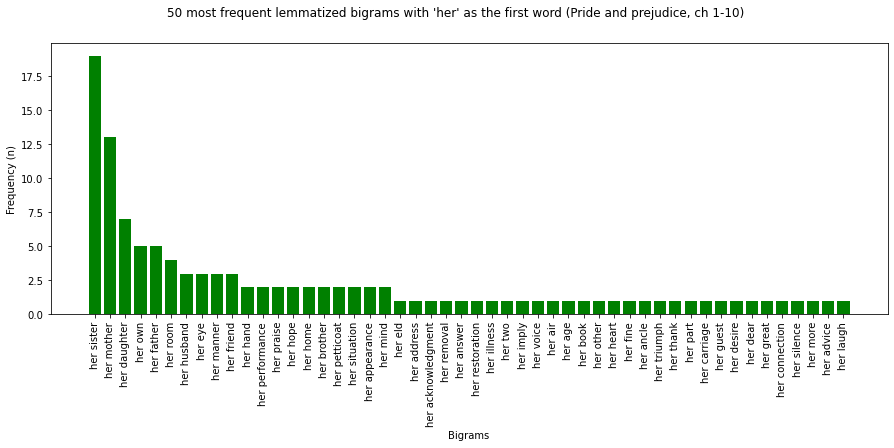

In [35]:
# The library matplotlib enables visualisations. We can do this also directly with pandas, which uses matlotlib too.
#
# Here is a simple example for visualising the 50 most common bigrams

import matplotlib
import matplotlib.pyplot as plt

bigrams_her = her_bigrams_count[0:50]

# we plot now our bigrams on a bar chart:

# we define the size of the figure
plt.figure(figsize = (15, 5)) 

# we put "index" values thus the bigrams on x-axis, and the count values (list) to y-axis, and define our bar chart color as "green"
plt.bar(bigrams_her.index, bigrams_her.tolist(), color="green")

# we rotate the x-axis labels by 90 so we can read them   
plt.xticks(rotation=90)

# we give a label to the x axis
plt.xlabel("Bigrams")

# we give a label to the y axis
plt.ylabel("Frequency (n)")

# we give a title to our figure
plt.suptitle("50 most frequent lemmatized bigrams with 'her' as the first word (Pride and prejudice, ch 1-10)")

# the figure is saved to our material folder
plt.savefig("./bigrams.png", dpi = 200)

# we display the figure in Jupiter Lab
plt.show()



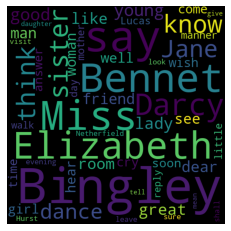

In [36]:
# We can also visualize our lemmas in a wordcloud; you need to install the wordcloud package first by using pip!

from wordcloud import WordCloud

wc = WordCloud(background_color="black",width=500,height=500, max_words=50).generate_from_frequencies(lemmas_count)
plt.imshow(wc)
plt.axis("off")
plt.savefig("./wordcloud.png", dpi = 200)
plt.show()

